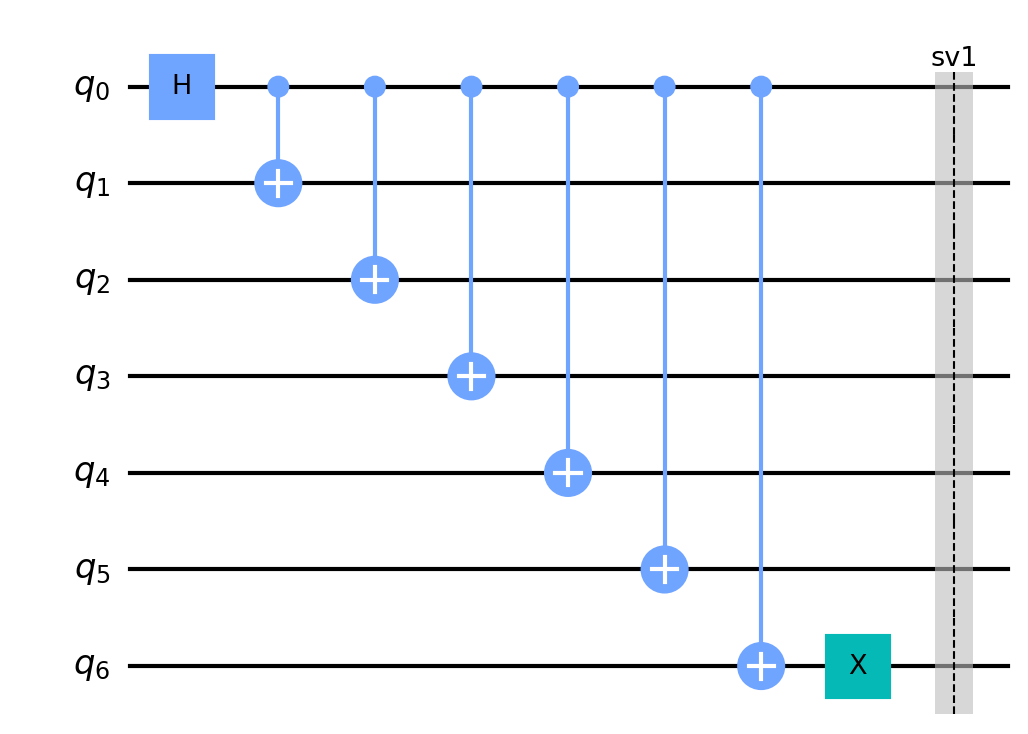

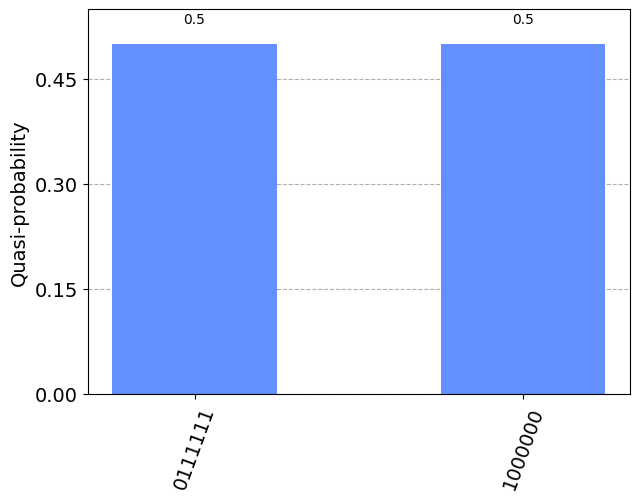

In [2]:
"""quantum_circuit2.ipynb"""
# Cell 1 - Circuit to produce only two states (63 or 64 decimal)

# Based on code created by @dbiersach:
# https://github.com/dbiersach/qis101/blob/0aa4537a02ac7f71d62ce6bbaf54e1e3175a5d51/labs/Session%2023%20-%20Quantum%20Circuits/quantum_circuit2.ipynb

from __future__ import annotations

import typing

from qiskit import Aer, QuantumCircuit, execute  # type: ignore
from qiskit.visualization import plot_distribution  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any

# Create Aer state vector simulator
backend: Any = Aer.get_backend("statevector_simulator")
qc: Any = QuantumCircuit(7)

# Apply a Hadamard gate to qubit 0 to put it into superposition
qc.h(0)
# Entangle qubit 0 with each of the remaining qubits using CNOT gates
qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(0, 3)
qc.cx(0, 4)
qc.cx(0, 5)
qc.cx(0, 6)
# Invert q6 so it differs from the rest of the qubits
qc.x(6)

qc.save_statevector("sv1")
result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()
display(qc.draw(output="mpl", scale=1.5))

# Display a histogram of probabilities based on final state vector
display(plot_distribution(counts))  # type: ignore

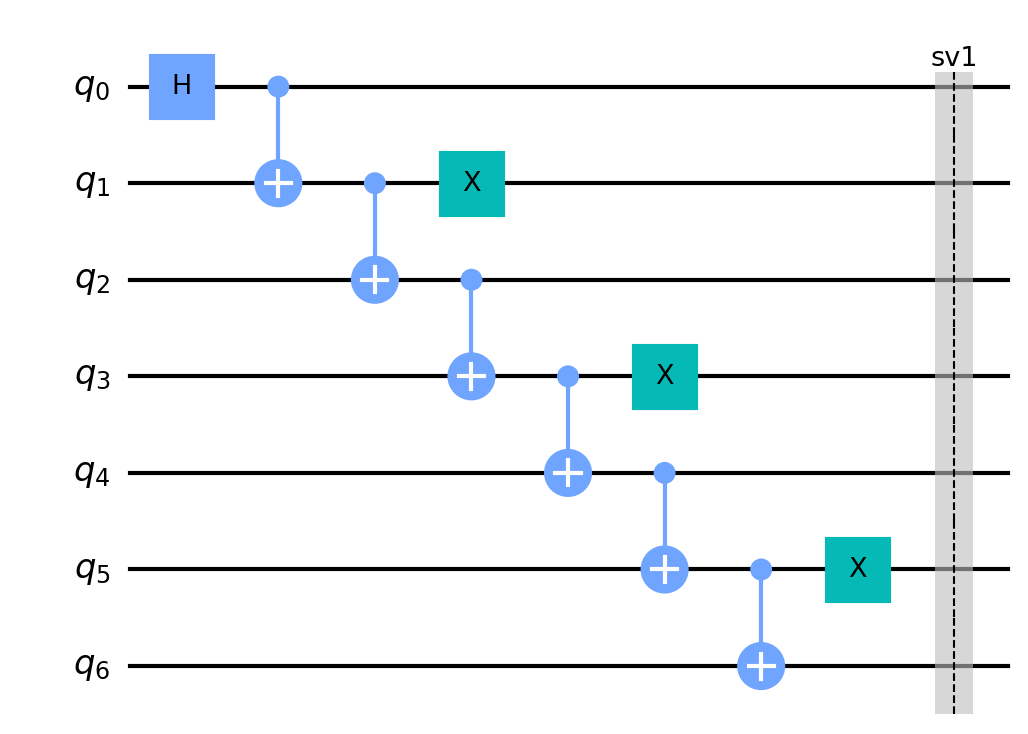

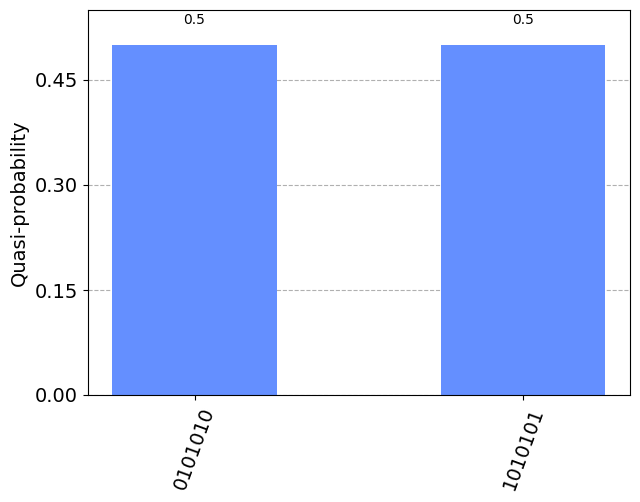

In [5]:
# Cell 2: Circuit to produce two states (42 or 85 decimal)

qc: Any = QuantumCircuit(7)

# Entangle all the qubits using a different method than defined above
# Put q0 into 50/50 superposition
qc.h(0)
# Entangle q0 with all remaining qubits using "stepped" CNOTS instead of 
# q0 as the only control line 
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)
qc.cx(3, 4)
qc.cx(4, 5)
qc.cx(5, 6)
# Invert q1, q3, and q5
qc.x(1)
qc.x(3)
qc.x(5)
# Save state vector
qc.save_statevector("sv1")

# Get probabilities from the final state vector
result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()
# Draw the circuit
display(qc.draw(output="mpl", scale=1.5))

# Display a histogram of probabilities based on final state vector
display(plot_distribution(counts)) # type: ignore